# Result Processing


In [2]:
from qutip import *
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [44]:
df_background = pd.read_csv("Counts_results_background2020-11-15-12-25.csv", index_col=0, names=["Channels","Counts"], header = 0)
df_AC = pd.read_csv("Counts_results2020-11-15-11-44.csv", index_col=0, names=["Channels","Counts"], header = 0)

In [45]:
df_AC["Corrected_counts"] = df_AC["Counts"] - df_background["Counts"]

In [46]:
df_background

,Channels,Counts
0,"['B1', 'C1']",517
1,"['B1', 'C2']",591
2,"['B1', 'C3']",38
3,"['B1', 'C4']",158
4,"['B2', 'C1']",169
5,"['B2', 'C2']",1030
6,"['B2', 'C3']",30
7,"['B2', 'C4']",91
8,"['B3', 'C1']",191
9,"['B3', 'C2']",416


In [47]:
df_AC

,Channels,Counts,Corrected_counts
0,"['B1', 'C1']",238,-279
1,"['B1', 'C2']",344,-247
2,"['B1', 'C3']",46,8
3,"['B1', 'C4']",221,63
4,"['B2', 'C1']",233,64
5,"['B2', 'C2']",1573,543
6,"['B2', 'C3']",68,38
7,"['B2', 'C4']",383,292
8,"['B3', 'C1']",482,291
9,"['B3', 'C2']",1119,703


In [48]:
results = list(df_AC["Corrected_counts"])

In [49]:
# Turn results into a quantum object in qutip
Density_Mat = np.array(results).reshape(4,4)
Norm_Density = []
for row in Density_Mat:
    for i in row:
        Norm_Density.append((i/max(row))/4)
Norm_Density_Mat = np.array(Norm_Density).reshape(4,4)
q = Qobj(Norm_Density_Mat)
q

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-1.10714286 -0.98015873  0.03174603  0.25      ]
 [ 0.02946593  0.25        0.0174954   0.13443831]
 [ 0.10348506  0.25        0.1913229   0.18314367]
 [ 0.03486204  0.09284116  0.01211782  0.25      ]]

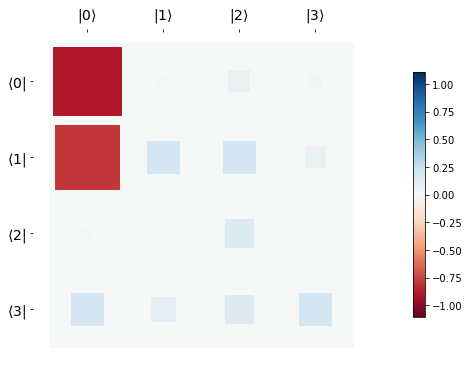

In [50]:
hinton(q);

(<Figure size 432x288 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x1ee972e1460>)

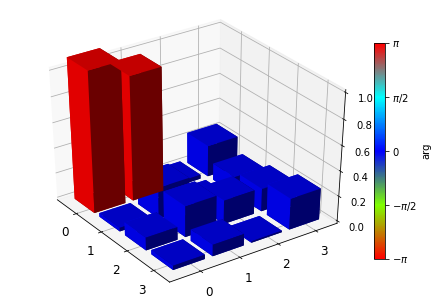

In [51]:
matrix_histogram_complex(q)

# Ring FSR

In [24]:
MMR1 = FSR_balance(read_csv_GC("FSR_MMR1.csv"))
MMR2 = FSR_balance(read_csv_GC("FSR_MMR2.csv"))
MMR3 = FSR_balance(read_csv_GC("FSR_MMR3.csv"))
MMR4 = FSR_balance(read_csv_GC("FSR_MMR4.csv"))
MMR_data_list = [MMR1, MMR2, MMR3, MMR4]

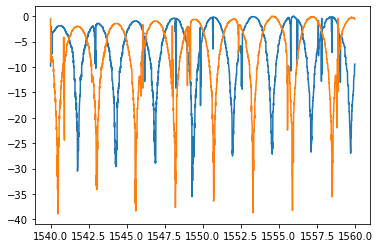

In [31]:
plt.plot(MMR1['Wavelength (nm)'], MMR1['Power (dB/m)'])
plt.plot(MMR2['Wavelength (nm)'], MMR2['Power (dB/m)'])

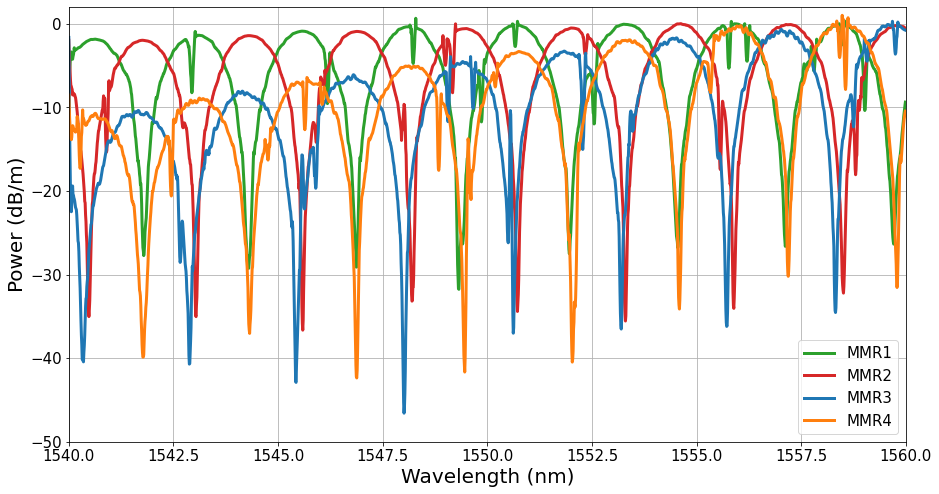

In [48]:
fig, ax1 = plt.subplots(figsize=(15,8))
colours = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']

for index, df in enumerate(MMR_data_list):
    x = df['Wavelength (nm)']
    y = savgol_filter(df['Power (dB/m)'],11,2)
    lns1 = ax1.plot(x, y, color=colours[index], markersize=7, linewidth=3)
    
ax1.set_xlabel('Wavelength (nm)', fontsize=20)
ax1.set_ylabel('Power (dB/m)', fontsize=20)
ax1.set_xlim(1540,1560)
ax1.set_ylim(-50,2)
ax1.tick_params(labelsize=15)
# plt.plot([0, 0], [0, 1.7], 'r--', lw=2)
plt.grid()

ax1.legend(['MMR1','MMR2','MMR3', 'MMR4'], fontsize=15, loc=4)

plt.savefig('MMR_FSR', bbox_inches='tight')

plt.show()

# Grating Coupler Efficiency

In [23]:
def read_csv_GC(filename):

    df = pd.read_csv(filename)
    df = df.transpose()
    df.rename({0: "Power (dB/m)"}, axis = 1, inplace = True)
    df.index.name = "Wavelength (nm)"
    df.reset_index(inplace = True)
    df["Wavelength (nm)"] = df["Wavelength (nm)"].astype(float)
    
    return df

def pd_normalise(df):
    df['Norm_Power'] = (df['Power (dB/m)']-df['Power (dB/m)'].min())/(df['Power (dB/m)'].max()-df['Power (dB/m)'].min())
    return df

def FSR_balance(df):
    df['Power (dB/m)'] = (df['Power (dB/m)']-df['Power (dB/m)'].max())
    return df

In [39]:
alice_df = pd_normalise(read_csv_GC("Alice_GC_Eff.csv").iloc[20:])
bob_df = pd_normalise(read_csv_GC("Bob_GC_Eff.csv").iloc[20:])
charlie_df = pd_normalise(read_csv_GC("Charlie_GC_Eff.csv").iloc[20:])
GC_data_list = [alice_df, bob_df, charlie_df]

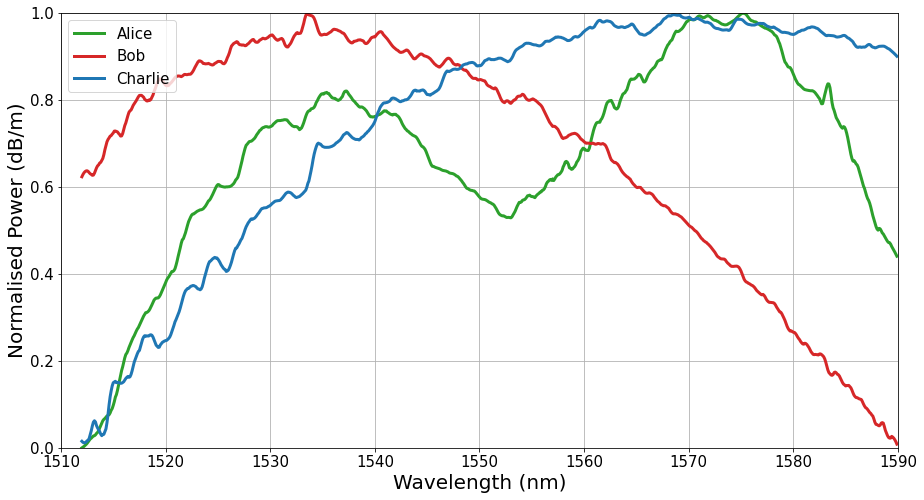

In [45]:
fig, ax1 = plt.subplots(figsize=(15,8))
colours = ['tab:green', 'tab:red', 'tab:blue']

for index, df in enumerate(GC_data_list):
    x = df['Wavelength (nm)']
    y = savgol_filter(df['Norm_Power'],11,2)
    lns1 = ax1.plot(x, y, color=colours[index], markersize=7, linewidth=3)
    
ax1.set_xlabel('Wavelength (nm)', fontsize=20)
ax1.set_ylabel('Normalised Power (dB/m)', fontsize=20)
ax1.set_xlim(1510,1590)
ax1.set_ylim(0,1)
ax1.tick_params(labelsize=15)
# plt.plot([0, 0], [0, 1.7], 'r--', lw=2)
plt.grid()

ax1.legend(['Alice','Bob','Charlie'], fontsize=15, loc=2)

plt.savefig('GC_eff', bbox_inches='tight')

plt.show()
